## REGRESSION LINEAIRE NUMPY

In [2]:
# Chargement de numpy
import numpy as np
# dataset génération aléatoire avec sklearn.make_regression
from sklearn.datasets import make_regression
# pour les graphiques
import matplotlib.pyplot as plt

### 1. DATASET

In [14]:
# dataset génération aléatoire avec sklearn.make_regression
# avec vecteur Y, matrice X et vecteur teta
x, y = make_regression(n_samples=100, n_features=1, noise=10)

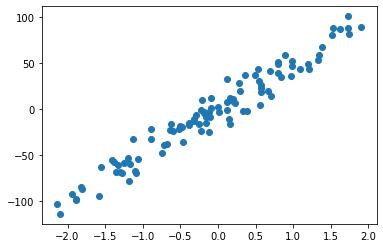

In [15]:
# visualiser y en fonction de x
plt.scatter(x, y)
plt.show()

#### GESTION DU VECTEUR Y

In [16]:
# Vérification des dimensions de la matrice
print(x.shape) # 100 lignes, 1 colonne
print(y.shape) # 100 lignes, rien : dimension incomplète ==> la compléter reshape()

(100, 1)
(100,)


In [17]:
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)


#### GESTION DE LA MATRICE X

In [18]:
# il nous faut une colonne X avec une colonne de biais : hstack
X = np.hstack((x, np.ones(x.shape)))
X.shape

(100, 2)

In [19]:
X

array([[ 0.79623827,  1.        ],
       [-0.62685902,  1.        ],
       [-1.81427208,  1.        ],
       [-1.35435055,  1.        ],
       [ 0.01381112,  1.        ],
       [ 0.1145574 ,  1.        ],
       [-1.19468944,  1.        ],
       [-1.10407049,  1.        ],
       [ 0.54730362,  1.        ],
       [ 0.57122027,  1.        ],
       [ 0.83790024,  1.        ],
       [-0.46016024,  1.        ],
       [-2.14078882,  1.        ],
       [-1.80908578,  1.        ],
       [ 0.16568589,  1.        ],
       [-0.32224939,  1.        ],
       [-0.38806666,  1.        ],
       [-1.12746211,  1.        ],
       [ 0.53078288,  1.        ],
       [-0.88517325,  1.        ],
       [ 0.22378597,  1.        ],
       [ 0.69994383,  1.        ],
       [ 1.38191607,  1.        ],
       [-0.68199187,  1.        ],
       [ 1.73470211,  1.        ],
       [-1.88873196,  1.        ],
       [ 1.33824708,  1.        ],
       [-0.12256839,  1.        ],
       [ 0.57736549,

### GESTION DU VECTEUR TETA

In [20]:
# teta non connu, on doit initilaiser téta avec des paramètres aléatoires
theta = np.random.randn(2, 1)
theta.shape

(2, 1)

In [22]:
theta # initialisé aléatoirement

array([[-0.80183611],
       [ 0.99117709]])

## 2. MODELE

In [23]:
# modèle linéaire ==> f(x) =X*theta
def model(X,theta):
    return X.dot(theta)

In [25]:
#  le modèle est disponible, on peut l'utiliser
model(X, theta)

array([[ 0.35272449],
       [ 1.49381528],
       [ 2.44592595],
       [ 2.07714426],
       [ 0.98010283],
       [ 0.89932082],
       [ 1.94912222],
       [ 1.87646067],
       [ 0.55232928],
       [ 0.53315204],
       [ 0.31931842],
       [ 1.36015018],
       [ 2.70773886],
       [ 2.44176739],
       [ 0.85832416],
       [ 1.24956829],
       [ 1.30234295],
       [ 1.89521692],
       [ 0.5655762 ],
       [ 1.70094096],
       [ 0.81173741],
       [ 0.42993685],
       [-0.11689311],
       [ 1.53802279],
       [-0.3997697 ],
       [ 2.50563057],
       [-0.08187774],
       [ 1.08945684],
       [ 0.52822459],
       [ 1.09019831],
       [ 1.24145069],
       [ 1.17624332],
       [ 1.06247185],
       [ 0.2015495 ],
       [ 0.72515335],
       [ 2.67954699],
       [ 0.03529734],
       [ 0.34950576],
       [ 1.36962575],
       [ 1.07859101],
       [ 1.93614078],
       [-0.40207522],
       [-0.30610955],
       [ 2.01736885],
       [ 1.9266109 ],
       [ 2

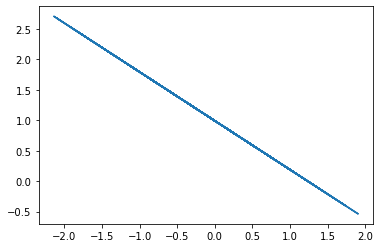

In [27]:
# afficher avec matplotlib les résultats de notre model par rapport au dataset
plt.plot(x, model(X, theta))
plt.show()

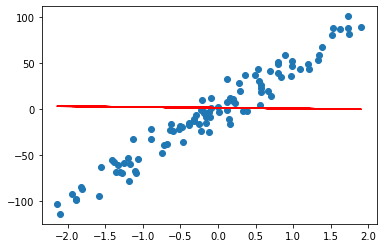

In [29]:
# en comparaison avec le dataset
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')
plt.show() #pas très bon modèle

## 3. FONCTION COUT

In [30]:
#  erreur quadratique moyenne
def fonction_cout(X, y, theta):
    m=len(y)
    return 1/(2*m) * np.sum((model(X, theta)-y)**2)

In [31]:
fonction_cout(X, y, theta) #fort coût car on veut qu'il tende vers 0

1285.6344875583652

## DESCENTE DE GRADIENT

### GESTION DU GRADIENT

In [40]:
# fonction pour calculer le gradient
def gradient(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta) - y)

### GESTION DE LA DESCENTE DE GRADIENT

In [41]:
# fonction de la descente de gradient itérative
def gradient_descente(X, y, theta, learning_rate, n_iterations):
    for i in range(0, n_iterations):
        theta = theta - learning_rate * gradient(X, y, theta) 
    return theta

## 4. ENTRAINEMENT DU MODELE

In [42]:
theta_final = gradient_descente(X, y, theta, learning_rate=0.001, n_iterations=1000)

In [43]:
theta_final

array([[30.33971749],
       [-1.70484847]])

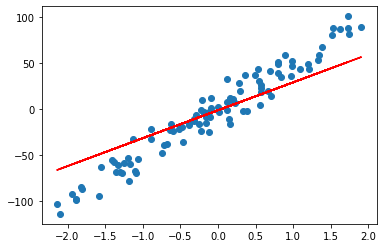

In [46]:
# est-ce que ce vecteur paramètre nous donne une bonne prédictions?
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')
plt.show()
# un peu mieux mais pas suffisant, l'apprentissage n'est pas terminé

In [47]:
# faire continuer l'apprentissage 
#  soit en refait des itérations
# soit on joue sur le learning rate .. .on fait de trop petit pas ==> 0.01.

In [48]:
theta_final_2 = gradient_descente(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [49]:
theta_final_2

array([[48.75364089],
       [-0.35555047]])

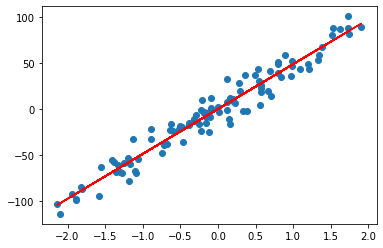

In [50]:
# est-ce que ce vecteur paramètre nous donne une bonne prédictions?
predictions = model(X, theta_final_2)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')
plt.show()
# oui bien meilleur résultat en réentrainant le modèle

## 5. COURBE D'APPRENTISSAGE

In [52]:
# comment tracer la minimisation de notre fonction coût avec le nombre d'itérations?
# comment voir si la machine réussi à bien apprendre?
# en modifiant la descente de gradient
def gradient_descente_bis(X, y, theta, learning_rate, n_iterations):
    # tableau rempli de zéro de dimension le nbre d'itérations
    cost_history= np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * gradient(X, y, theta) 
        # on sauvegarde le coût pour chaque itération
        cost_history[i] = fonction_cout(X, y, theta)
    return theta, cost_history

In [56]:
theta_final_2, cost_history = gradient_descente_bis(X, y, theta,
                                                    learning_rate=0.01, n_iterations=1000)

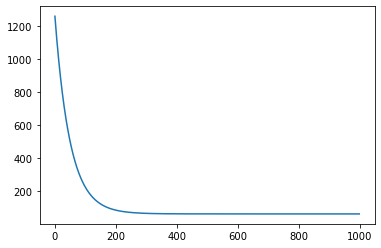

In [58]:
# tracer la progression de la fonction cout en fonction de l'itération
plt.plot(range(1000), cost_history)
plt.show()
# on peut voir que passer 400 itérations la machine ne progresse plus

## 6 COEFFICIENT DE DETERMINATION

In [59]:
# comment évaluer la performance de notre modèle en utilisant le coefficient de détermination
# coef de détermination = R au carré - méthode des moindes carrés
def coefficient_determination(y, predictions):
    u = ((y - predictions)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [60]:
#  calcul pour y et vecteur prédiction
coefficient_determination(y, predictions)
# 0.95 proche de 1 ==> OK maispeu faire mieux

0.9509735560742366